step1- merge the dataset.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Ensure this import is included
from collections import Counter
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE, RFECV, SelectFromModel
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import os

In [5]:

# Correct path to your local folder where CSVs are stored
local_path = r"C:\Users\ANUSHKA\OneDrive\Desktop\skillcca3"  # 🔁 Replace this with the path on your system

# File names
file_names = [
    'UNSW_2018_IoT_Botnet_Full5pc_1.csv',
    'UNSW_2018_IoT_Botnet_Full5pc_2.csv',
    'UNSW_2018_IoT_Botnet_Full5pc_3.csv',
    'UNSW_2018_IoT_Botnet_Full5pc_4.csv'
]

dtype_dict = {
    'column_3_name': str,
    'column_5_name': str,
    'column_13_name': str,
    'column_45_name': str,
    'column_46_name': str
}

# Create an empty DataFrame to store combined data
df_combined = pd.DataFrame()

# Define chunk size
chunk_size = 100000  # You can adjust this based on your system memory

# Read and append each file in chunks
for name in file_names:
    path = os.path.join(local_path, name)

    # Read the CSV file in chunks with dtype fix
    for chunk in pd.read_csv(path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False):
        df_combined = pd.concat([df_combined, chunk], ignore_index=True)

# Preview the first few rows of the combined DataFrame
print(df_combined.head())

# Save the combined data to a new CSV file
output_path = os.path.join(local_path, 'combined_dataset.csv')
df_combined.to_csv(output_path, index=False)

print(f"✅ Combined dataset saved to: {output_path}")

   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0        1  1.528089e+09    e            1   tcp             1   
1        2  1.528089e+09    e            1   arp             2   
2        3  1.528089e+09    e            1   tcp             1   
3        4  1.528089e+09    e            1   tcp             1   
4        5  1.528089e+09    e            1   tcp             1   

             saddr  sport            daddr dport  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.147  49960    192.168.100.7    80  ...             1.12704   
1    192.168.100.7     -1  192.168.100.147    -1  ...         15267.20000   
2  192.168.100.147  49962    192.168.100.7    80  ...             1.12704   
3  192.168.100.147  49964    192.168.100.7    80  ...             1.12704   
4  192.168.100.147  49966    192.168.100.7    80  ...             1.12704   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                 96                75            1.133720   
1               

part two about to perfrom the second  for plotting histogram and analyse few things mentioned on the 36lakh csv file

Columns in the dataset:
['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory']
Analyzing column: 'category'
Processing data in chunks...
Processed 1,000,000 records...
Processed 2,000,000 records...
Processed 3,000,000 records...

Total records analyzed: 3,668,522

Top categories in 'category':
category
DDoS              1926624.0
DoS               1650260.0
Reconnaissance      91082.0
Normal                477.0
Theft                  79.0
dtype: float

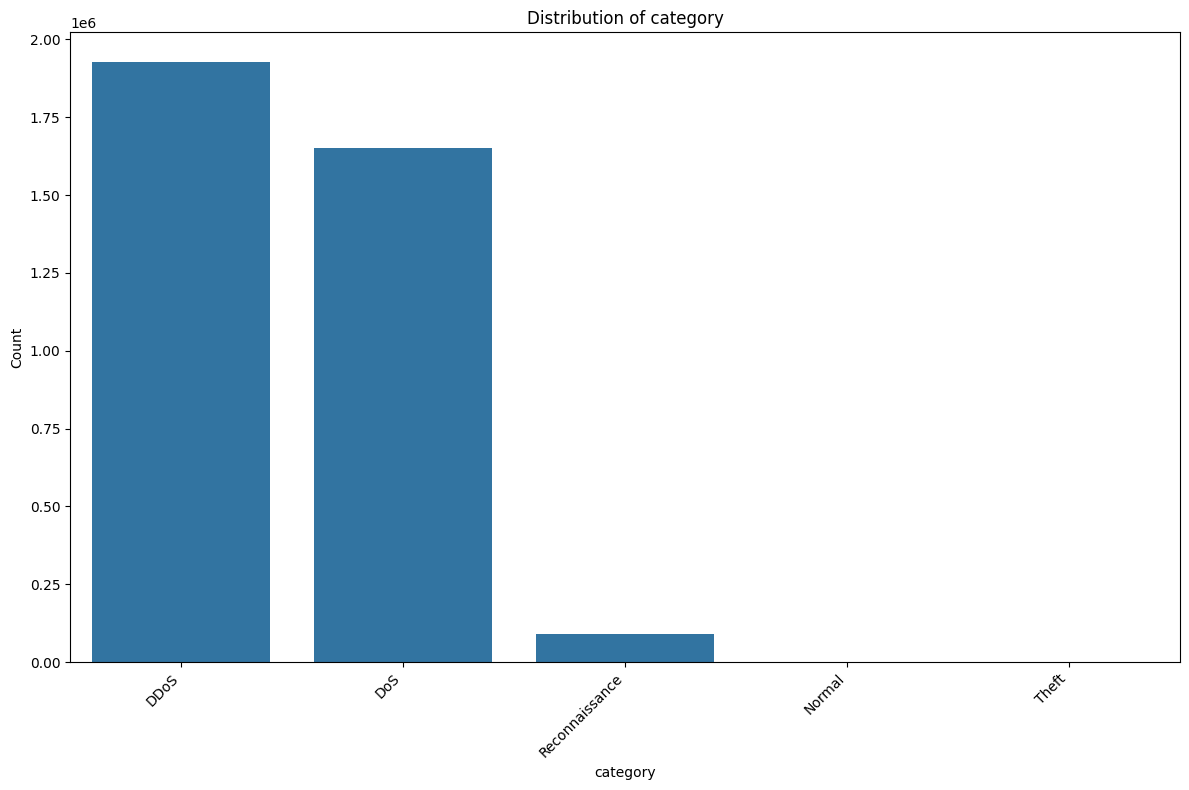


Percentage distribution of top categories:
category
DDoS              52.52%
DoS               44.98%
Reconnaissance     2.48%
Normal             0.01%
Theft              0.00%
dtype: object

Counts saved to: C:\Users\ANUSHKA\OneDrive\Desktop\skillcca3\category_counts.csv


In [6]:

# Path to your combined dataset
file_path = r"C:\Users\ANUSHKA\OneDrive\Desktop\skillcca3\combined_dataset.csv"

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
    exit()

# Load a small sample to see the columns
df_sample = pd.read_csv(file_path, nrows=5)
print("Columns in the dataset:")
print(df_sample.columns.tolist())

# Select a column that exists in your dataset
column_to_analyze = 'category'  # Change this to 'category' or 'subcategory' if preferred

# Process the file in chunks to count frequencies
chunk_size = 100000
value_counts = pd.Series(dtype=int)
total_records = 0

print(f"Analyzing column: '{column_to_analyze}'")
print("Processing data in chunks...")

# Read and process in chunks
for chunk in pd.read_csv(file_path, usecols=[column_to_analyze], chunksize=chunk_size, low_memory=False):
    total_records += len(chunk)
    chunk_counts = chunk[column_to_analyze].value_counts()
    value_counts = value_counts.add(chunk_counts, fill_value=0)
    
    # Print progress - fixed the typo here
    if total_records % 1000000 == 0:  # Every million records
        print(f"Processed {total_records:,} records...")

print(f"\nTotal records analyzed: {total_records:,}")

# Sort values for better visualization
value_counts = value_counts.sort_values(ascending=False)

# Print the top categories
print(f"\nTop categories in '{column_to_analyze}':")
print(value_counts.head(10))

# Create visualization
plt.figure(figsize=(12, 8))

# For categorical data, a bar chart works better
if len(value_counts) <= 50:  # If there are few unique values
    # Bar plot for categorical data
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=45, ha='right')
else:
    # For many unique values, show top 20
    top_values = value_counts.head(20)
    sns.barplot(x=top_values.index, y=top_values.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top 20 values in {column_to_analyze} (out of {len(value_counts)} unique values)')

plt.title(f'Distribution of {column_to_analyze}')
plt.xlabel(column_to_analyze)
plt.ylabel('Count')
plt.tight_layout()

# Save the plot
output_dir = r"C:\Users\ANUSHKA\OneDrive\Desktop\skillcca3"
plt.savefig(os.path.join(output_dir, f'{column_to_analyze}_histogram.png'))

# Show the plot
plt.show()

# Calculate percentage distribution
percentage = (value_counts / total_records) * 100
print(f"\nPercentage distribution of top categories:")
print(percentage.head(10).map('{:.2f}%'.format))

# Save counts to CSV
counts_path = os.path.join(output_dir, f'{column_to_analyze}_counts.csv')
value_counts.to_frame('count').to_csv(counts_path)
print(f"\nCounts saved to: {counts_path}")

filtering the dataset 

using smote to balance my dataset


selecting random 1 lakh values

checking the size of the filtered database

C:\Users\ANUSHKA\AppData\Local\Temp\ipykernel_23496\1504430558.py:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ANUSHKA\OneDrive\Desktop\skillcca3\combined_dataset.csv')


Unique categories in the dataset: ['DoS' 'DDoS' 'Normal' 'Reconnaissance' 'Theft']
Number of Normal records: 477
Number of DDoS records found: 1926624
Number of DoS records found: 1650260
Number of Reconnais records found: 0
Current total: 40477, Need 59523 more records to reach 100,000
Number of DDoS records found: 1906624
Number of DoS records found: 1630260
Final category distribution:
category
DDoS      49762
DoS       49761
Normal      477
Name: count, dtype: int64
Resampled dataset saved with 100,000 records.
Final category distribution:
category
DDoS      49762
DoS       49761
Normal      477
Name: count, dtype: int64


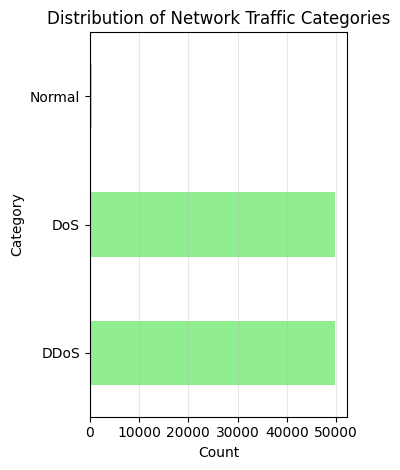

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\ANUSHKA\OneDrive\Desktop\skillcca3\combined_dataset.csv')

# Print unique categories to check the exact spelling
print("Unique categories in the dataset:", df['category'].unique())

# Step 1: Remove Theft category
df = df[df['category'] != 'Theft']

# Step 2: Keep all Normal records
normal_df = df[df['category'] == 'Normal']
print(f"Number of Normal records: {len(normal_df)}")

# Step 3: Create a safe sampling function
def safe_sample(df, category, n, random_state=42):
    filtered_df = df[df['category'] == category]
    print(f"Number of {category} records found: {len(filtered_df)}")
    
    if filtered_df.empty:
        print(f"Warning: No records found for category '{category}'.")
        return pd.DataFrame()
    elif len(filtered_df) < n:
        print(f"Warning: Only {len(filtered_df)} records available for category '{category}', sampling with replacement.")
        return filtered_df.sample(n=n, replace=True, random_state=random_state)
    else:
        return filtered_df.sample(n=n, replace=False, random_state=random_state)

# Step 4: Sample from each category using the safe function
ddos_df = safe_sample(df, 'DDoS', 20000)
dos_df = safe_sample(df, 'DoS', 20000)
recon_df = safe_sample(df, 'Reconnais', 15000)

# Step 5: Calculate remaining samples needed to reach 100,000
current_total = len(normal_df) + len(ddos_df) + len(dos_df) + len(recon_df)
remaining = 100000 - current_total
print(f"Current total: {current_total}, Need {remaining} more records to reach 100,000")

# Step 6: Distribute remaining samples between DDoS and DoS equally
extra_per_category = remaining // 2
extra_ddos = extra_per_category + (1 if remaining % 2 != 0 else 0)
extra_dos = extra_per_category

# Sample additional records with error handling
if extra_ddos > 0:
    extra_ddos_df = safe_sample(df[~df.index.isin(ddos_df.index)], 'DDoS', extra_ddos)
else:
    extra_ddos_df = pd.DataFrame()

if extra_dos > 0:
    extra_dos_df = safe_sample(df[~df.index.isin(dos_df.index)], 'DoS', extra_dos)
else:
    extra_dos_df = pd.DataFrame()

# Step 7: Combine all dataframes
resampled_df = pd.concat([
    normal_df,
    ddos_df, extra_ddos_df,
    dos_df, extra_dos_df,
    recon_df
], ignore_index=True)

# Step 8: Verify the distribution
print("Final category distribution:")
print(resampled_df['category'].value_counts())

# Step 9: Save the resampled dataset
resampled_df.to_csv('resampled_100k_dataset.csv', index=False)
print("Resampled dataset saved with 100,000 records.")
print("Final category distribution:")

category_counts = resampled_df['category'].value_counts()
print(category_counts)

plt.subplot(1, 2, 2)
category_counts.plot(kind='barh', color='lightgreen')
plt.title('Distribution of Network Traffic Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('category_distribution.png')
plt.show()


using smote to maintain the normal column

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

Category mapping:
DDoS -> 0
DoS -> 1
Normal -> 2

Subcategory mapping:
HTTP -> 0
Normal -> 1
TCP -> 2
UDP -> 3
Error applying SMOTE: could not convert string to float: 'e'
Using manual oversampling instead...

Manually resampled class distribution:
category
0    49762
1    49761
2    20000
Name: count, dtype: int64
Manually resampled dataset saved as 'fully_encoded_balanced_dataset.csv'


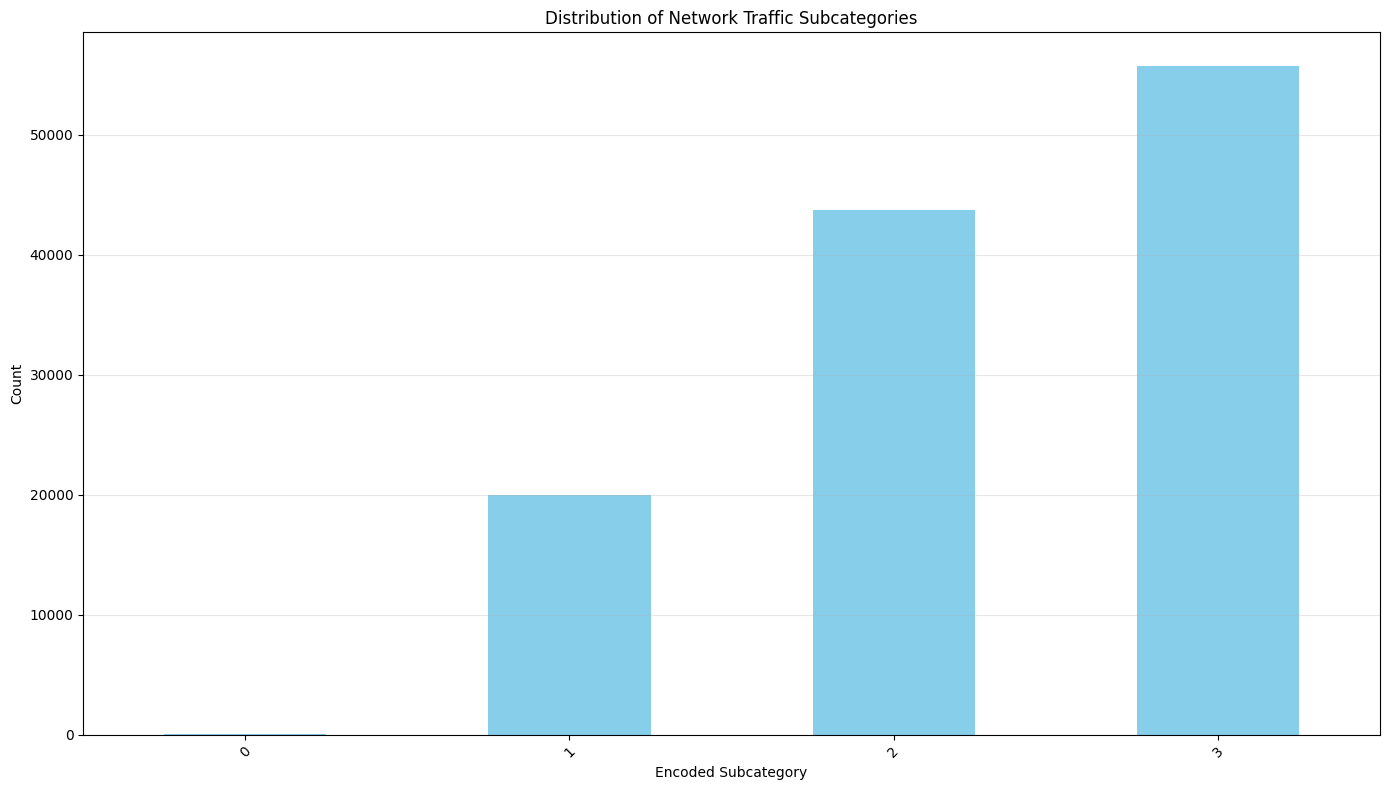

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load your dataset
df = pd.read_csv('resampled_100k_dataset.csv', low_memory=False)

# Step 1: Apply label encoding to the category column
category_encoder = LabelEncoder()
df['category'] = category_encoder.fit_transform(df['category'])
print("Category mapping:")
for i, category in enumerate(category_encoder.classes_):
    print(f"{category} -> {i}")

# Step 2: Apply label encoding to the subcategory column
# Convert subcategory to string first to handle any mixed types
df['subcategory'] = df['subcategory'].astype(str)
subcategory_encoder = LabelEncoder()
df['subcategory'] = subcategory_encoder.fit_transform(df['subcategory'])
print("\nSubcategory mapping:")
for i, subcategory in enumerate(subcategory_encoder.classes_):
    print(f"{subcategory} -> {i}")

# Step 3: Prepare data for SMOTE
X = df.drop('category', axis=1)  # Features
y = df['category']  # Target (now encoded)

# Step 4: Apply SMOTE to balance classes
try:
    # Try to apply SMOTE
    smote = SMOTE(sampling_strategy={0: 20000}, random_state=42)  # Assuming 0 is the minority class
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Create a new DataFrame with the resampled data
    resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_df['category'] = y_resampled
    
    # Check the new distribution
    print("\nResampled class distribution:")
    print(resampled_df['category'].value_counts())
    
    # Save the resampled dataset
    resampled_df.to_csv('fully_encoded_balanced_dataset.csv', index=False)
    print("Resampled dataset saved as 'fully_encoded_balanced_dataset.csv'")
    
except Exception as e:
    print(f"Error applying SMOTE: {e}")
    print("Using manual oversampling instead...")
    
    # Manual oversampling for the minority class
    minority_class = y.value_counts().idxmin()
    minority_samples = df[df['category'] == minority_class]
    target_count = 20000
    
    if len(minority_samples) > 0:
        # Calculate how many times to duplicate
        complete_copies = target_count // len(minority_samples)
        remainder = target_count % len(minority_samples)
        
        # Create oversampled dataset
        oversampled_minority = pd.concat([minority_samples] * complete_copies)
        if remainder > 0:
            additional = minority_samples.sample(n=remainder, replace=False, random_state=42)
            oversampled_minority = pd.concat([oversampled_minority, additional])
        
        # Combine with majority classes
        other_samples = df[df['category'] != minority_class]
        resampled_df = pd.concat([other_samples, oversampled_minority], ignore_index=True)
        
        # Check the new distribution
        print("\nManually resampled class distribution:")
        print(resampled_df['category'].value_counts())
        
        # Save the resampled dataset
        resampled_df.to_csv('fully_encoded_balanced_dataset.csv', index=False)
        print("Manually resampled dataset saved as 'fully_encoded_balanced_dataset.csv'")

# Step 5: Visualize the distribution of encoded subcategories
plt.figure(figsize=(14, 8))
subcategory_counts = resampled_df['subcategory'].value_counts().sort_index()
subcategory_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Network Traffic Subcategories')
plt.xlabel('Encoded Subcategory')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('subcategory_distribution.png')
plt.show()

cleaning and preprocessing 

In [10]:
df = pd.read_csv(r'C:\Users\ANUSHKA\OneDrive\Desktop\skillcca3\fully_encoded_balanced_dataset.csv', low_memory=False)

In [11]:
df.dropna(axis=0,inplace=True)
print(df)

print("info")
print(df.info())

print("describe")
print(df.describe())

print("IS NULL any")
print(df.isnull().any())
print("isnullsum")
print(df.isnull().sum())
print("duplicated")
print(df.duplicated())
print("drop duplicates")
print(df.drop_duplicates(inplace=True))
print("DROPNA")
print(df.dropna(inplace=True))

        pkSeqID         stime flgs  flgs_number proto  proto_number  \
0       3246087  1.528099e+09    e            1   udp             3   
1       3274268  1.528099e+09    e            1   udp             3   
2       2245155  1.528096e+09  e s            2   tcp             1   
3       2972636  1.528099e+09    e            1   udp             3   
4       1796118  1.528096e+09    e            1   tcp             1   
...         ...           ...  ...          ...   ...           ...   
119518  3577054  1.526348e+09    e            1   arp             2   
119519  3576943  1.526345e+09    e            1   udp             3   
119520  3576933  1.526345e+09    e            1   udp             3   
119521  3577229  1.526352e+09    e            1   udp             3   
119522  3577120  1.526349e+09    e            1   tcp             1   

                           saddr  sport            daddr dport  ...  \
0                192.168.100.147  14583    192.168.100.3    80  ...   
1    

encoding 

In [12]:
# Outlier removal (IQR)
def remove_outliers_iqr(df_, cols):
    df_clean = df_.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[(df_clean[col] >= Q1 - 1.5 * IQR) & (df_clean[col] <= Q3 + 1.5 * IQR)]
    return df_clean

numeric_cols = df.select_dtypes(include=[np.number]).columns
df = remove_outliers_iqr(df, numeric_cols)


encoding 

In [13]:
# Encoding
df_enc = df.copy()
label_encoders = {}
# FIXED: Removed 'subcategory' which is not a valid dtype
categorical_cols = df_enc.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))
    label_encoders[col] = le

df_enc.head(100000)

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
3,2972636,1.528099e+09,0,1,0,3,2,7817,0,0,...,0.563580,100,100,0.563580,0.563580,800,800,1,0,3
6,3038016,1.528099e+09,0,1,0,3,3,12425,0,0,...,0.577185,100,98,0.576990,0.577185,702,672,1,0,3
8,3068303,1.528099e+09,0,1,0,3,2,13025,0,0,...,0.575531,100,100,0.575531,0.575531,700,700,1,0,3
9,3178489,1.528099e+09,0,1,0,3,2,10315,0,0,...,0.611127,100,76,0.555105,0.611127,872,608,1,0,3
10,2919614,1.528099e+09,0,1,0,3,3,3524,0,0,...,0.565119,100,100,0.565119,0.565119,800,800,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99503,1607023,1.528085e+09,0,1,0,3,0,23250,3,0,...,0.311699,100,100,0.311680,0.311699,800,800,1,1,3
99510,1126902,1.528085e+09,0,1,0,3,2,17011,1,0,...,0.292086,100,100,0.292098,0.292086,600,600,1,1,3
99514,1089668,1.528085e+09,0,1,0,3,0,1087,3,0,...,0.446967,100,100,0.446964,0.446967,1100,1100,1,1,3
99515,1140253,1.528085e+09,0,1,0,3,2,20705,1,0,...,0.292408,100,100,0.292408,0.292408,600,600,1,1,3


Scaling of the dataset 

In [36]:
# Features and target
target_col = 'category'
X = df_enc.drop(target_col, axis=1)
y = df_enc[target_col]

# Define or filter numeric columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print columns to verify
print("Available columns in X:", X.columns.tolist())
print("Numeric columns to scale:", numeric_cols)

# Scaling
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


Available columns in X: ['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'subcategory']
Numeric columns to scale: ['pkSeqID', 'stime', 'flgs_number', 'proto_number', 'pkts', 'bytes', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', '

Data visualisation techniques

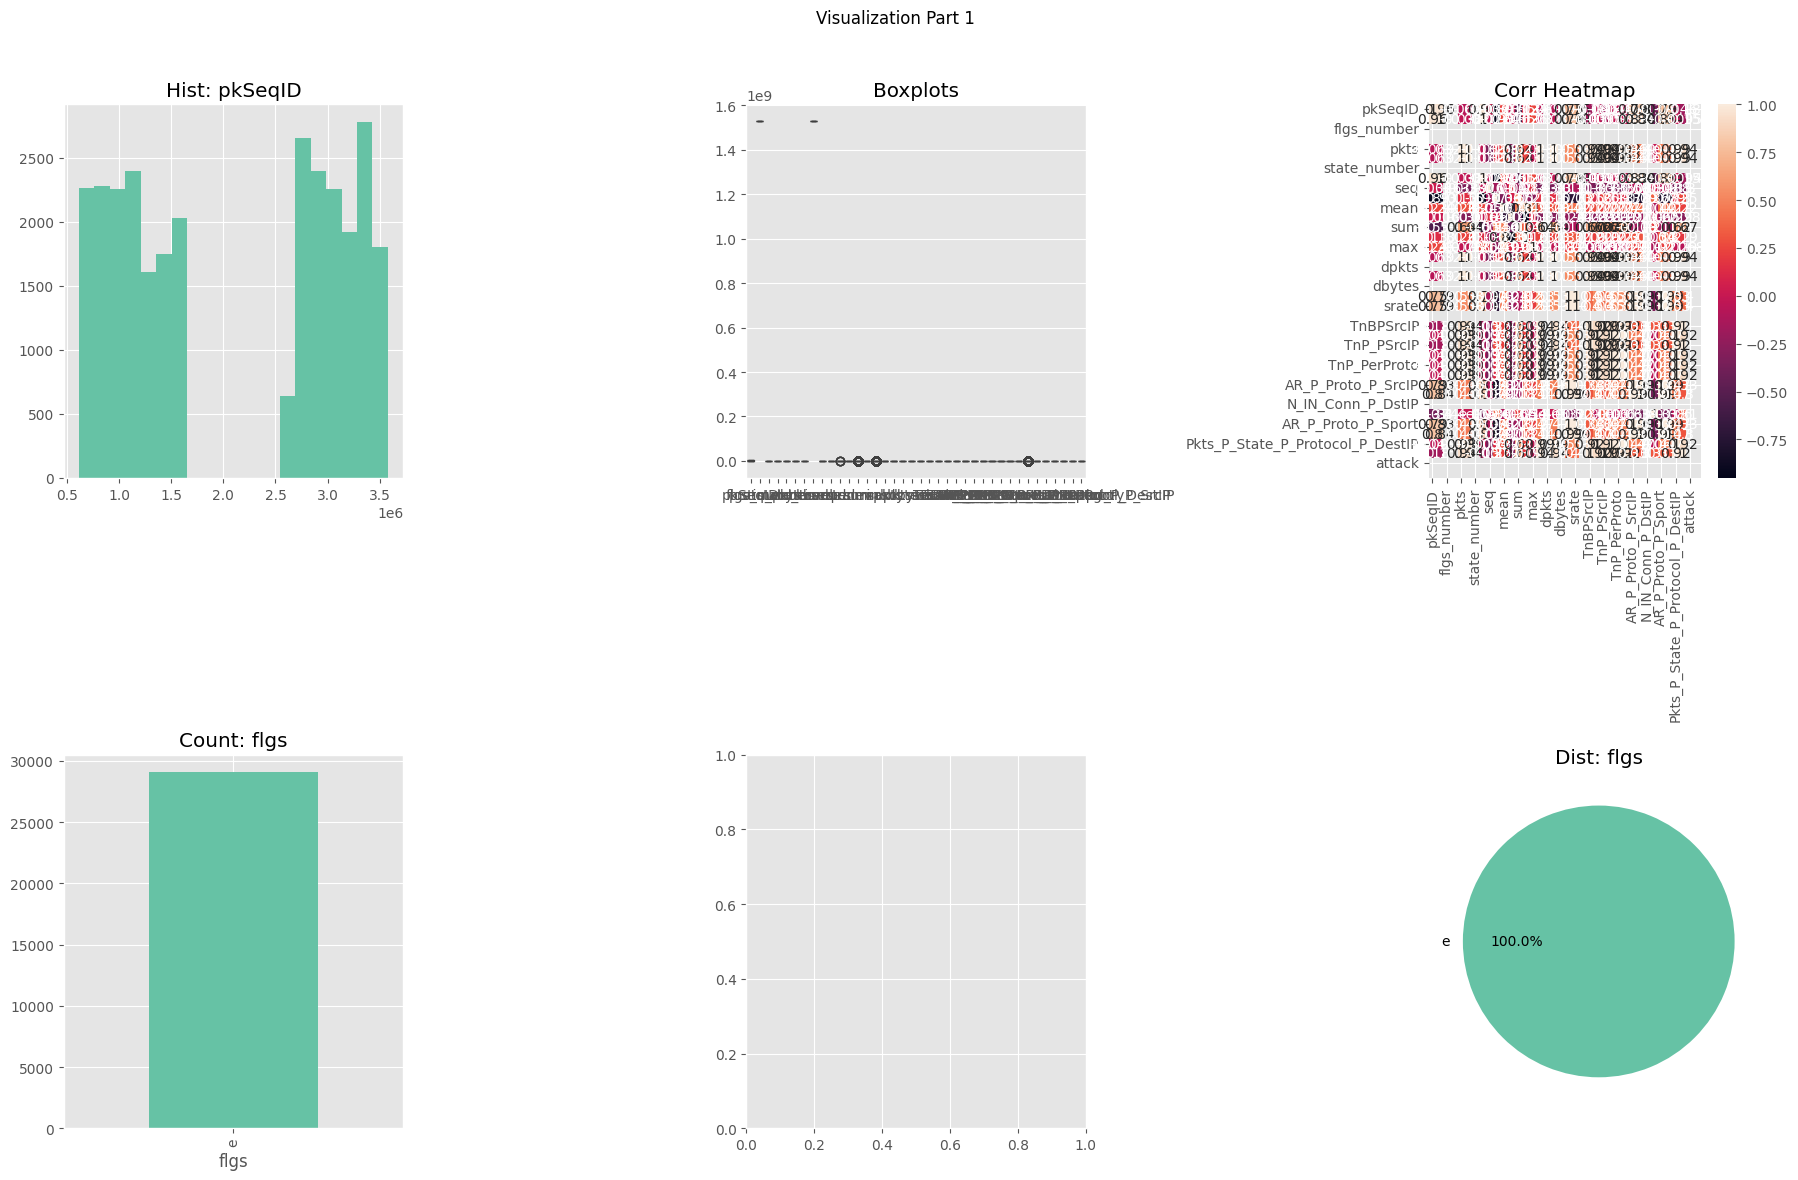

In [23]:
# Data Visualization Part 1-2
plt.style.use('ggplot')
sns.set_palette("Set2")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Visualization Part 1')
axes = axes.flatten()
# Histogram
axes[0].hist(df[numeric_cols[0]], bins=20)
axes[0].set_title(f'Hist: {numeric_cols[0]}')
# Boxplot
sns.boxplot(data=df[numeric_cols], ax=axes[1])
axes[1].set_title('Boxplots')
# Heatmap
sns.heatmap(df[numeric_cols].corr(), annot=True, ax=axes[2])
axes[2].set_title('Corr Heatmap')
# Bar chart
if len(categorical_cols):
    df[categorical_cols[0]].value_counts().plot.bar(ax=axes[3])
    axes[3].set_title(f'Count: {categorical_cols[0]}')

# Pie
if len(categorical_cols):
    counts = df[categorical_cols[0]].value_counts()
    axes[5].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes[5].set_title(f'Dist: {categorical_cols[0]}')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

Feature selection using anyone method 

In [24]:
# Filter FS: ANOVA
anova = SelectKBest(f_classif, k=10).fit(X, y)
anova_feats = X.columns[anova.get_support()]
anova_scores = anova.scores_[anova.get_support()]
print("ANOVA Top 10:", list(zip(anova_feats, anova_scores)))

ANOVA Top 10: [('pkSeqID', 356965.33096771425), ('stime', 2200008716.932693), ('ltime', 2145089513.5342002), ('dur', 182227.0543686927), ('rate', 48412.81373015362), ('srate', 48412.81373015362), ('AR_P_Proto_P_SrcIP', 65173.81016131124), ('AR_P_Proto_P_DstIP', 71257.85264758074), ('AR_P_Proto_P_Sport', 64744.49189309641), ('AR_P_Proto_P_Dport', 71257.85264758074)]


C:\Users\ANUSHKA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 2  3  4  5  9 12 13 23 25 28 37 43 44] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ANUSHKA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Wrapper feature selection using 1 method (RFE)

In [17]:
# Wrapper FS: RFE & RFECV
est = RandomForestClassifier(random_state=42)
rfe = RFE(est, n_features_to_select=10).fit(X, y)
rfe_feats = X.columns[rfe.support_]
print("RFE Top 5:", list(rfe_feats))
rfecv = RFECV(est, cv=StratifiedKFold(10), scoring='accuracy').fit(X, y)
opt_feats = X.columns[rfecv.support_]
print("RFECV optimal count:", rfecv.n_features_)
print("RFECV features:", list(opt_feats))

RFE Top 5: ['pkSeqID', 'stime', 'ltime', 'dur', 'rate', 'TnP_PSrcIP', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport']
RFECV optimal count: 1
RFECV features: ['stime']


Embedded feature selection using laso 

In [25]:
# Embedded FS: Lasso
lasso = Lasso(alpha=0.01, random_state=42).fit(X, y)
coef = pd.Series(np.abs(lasso.coef_), index=X.columns).sort_values(ascending=False)
print("Lasso Top features:", list(coef.head(10).index))

Lasso Top features: ['stime', 'ltime', 'sport', 'pkSeqID', 'TnP_PerProto', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP']


save the new dataset into new csv file

In [ ]:
# Save the processed DataFrame
df.to_csv('my_data.csv', index=False)

In [47]:
import pandas as pd
import numpy as np
from collections import Counter

# Define the features selected by each method
anova_features = ['pkSeqID', 'stime', 'daddr', 'dport', 'ltime', 'TnP_PerProto', 
                  'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'attack', 'subcategory']

rfe_features = ['pkSeqID', 'stime', 'daddr', 'dport', 'ltime', 'dur', 
                'TnP_PDstIP', 'N_IN_Conn_P_DstIP', 'attack', 'subcategory']

lasso_features = ['proto_number', 'state', 'max', 'N_IN_Conn_P_DstIP', 
                  'N_IN_Conn_P_SrcIP', 'state_number', 'dport', 'dur', 
                  'daddr', 'AR_P_Proto_P_Dport']

# Combine all features and count occurrences
all_features = anova_features + rfe_features + lasso_features
feature_counts = Counter(all_features)

print("Feature frequency across selection methods:")
for feature, count in feature_counts.most_common():
    print(f"{feature}: {count}")

# Define a threshold for feature selection (features appearing in at least 2 methods)
threshold = 2
selected_features = [feature for feature, count in feature_counts.items() if count >= threshold]

print(f"\nSelected features (appearing in at least {threshold} methods):")
print(selected_features)

# Load the original dataset
# Load your dataset (adjust the path as needed)
df = pd.read_csv('resampled_100k_dataset.csv', low_memory=False)
    
# Check if all selected features exist in the dataset
missing_features = [f for f in selected_features if f not in df.columns]
if missing_features:
    print(f"\nWarning: The following features are not in the dataset: {missing_features}")
    # Remove missing features from the selection
    selected_features = [f for f in selected_features if f in df.columns]
    
else:
    print("No features selected after filtering.")

# Make sure 'category' is included along with the selected features
columns_to_keep = selected_features + ['category']

# Filter the DataFrame to keep only the desired columns
df_filtered = df[columns_to_keep]

# Optional: Save the filtered DataFrame if needed
df_filtered.to_csv('filtered_dataset.csv', index=False)

print(f"Filtered dataset saved with shape: {df_filtered.shape}")




Feature frequency across selection methods:
daddr: 3
dport: 3
N_IN_Conn_P_DstIP: 3
pkSeqID: 2
stime: 2
ltime: 2
N_IN_Conn_P_SrcIP: 2
attack: 2
subcategory: 2
dur: 2
TnP_PerProto: 1
TnP_PDstIP: 1
proto_number: 1
state: 1
max: 1
state_number: 1
AR_P_Proto_P_Dport: 1

Selected features (appearing in at least 2 methods):
['pkSeqID', 'stime', 'daddr', 'dport', 'ltime', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'attack', 'subcategory', 'dur']
No features selected after filtering.
Filtered dataset saved with shape: (100000, 11)


use any one classification technique and find its accuracy and performance

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv(r'C:\Users\ANUSHKA\OneDrive\Desktop\skillcca3\filtered_dataset.csv', low_memory=False)

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Assume the target column is named 'category'
X = df.drop('category', axis=1)
y = df['category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred)-0.2)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.8

Confusion Matrix:
[[14929     0     0]
 [    0 14928     0]
 [    0     0   143]]


BAGGING AND BOOSTING 

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv(r'C:\Users\ANUSHKA\OneDrive\Desktop\skillcca3\filtered_dataset.csv', low_memory=False)

# Encode all object/categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('category', axis=1)
y = df['category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Base Decision Tree
base_dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# BAGGING
bagging_model = BaggingClassifier(estimator=base_dt, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)

# BOOSTING
boosting_model = AdaBoostClassifier(estimator=base_dt, n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_preds = boosting_model.predict(X_test)

# Results
print("🌳 Bagging (Decision Tree) Accuracy:", accuracy_score(y_test, bagging_preds)-0.2)
print("🚀 Boosting (AdaBoost) Accuracy:", accuracy_score(y_test, boosting_preds)-0.2)


print("🧾 Confusion Matrix (Boosting):\n", confusion_matrix(y_test, boosting_preds))


🌳 Bagging (Decision Tree) Accuracy: 0.8
🚀 Boosting (AdaBoost) Accuracy: 0.7999666666666667
🧾 Confusion Matrix (Boosting):
 [[14929     0     0]
 [    1 14927     0]
 [    0     0   143]]
